# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

#### Additional Hypothesis

In [251]:
# See README.md

#    Success loan applicants will be:
#        - Married 
#        - Have a credit history 
#        - Have at least one dependent 
#        - Have a combined income higher than the median single income
#        - Will not be self employed

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

### Data Wrangling and Prep

In [252]:
import pandas as pd
import numpy as np

#### Raw Dataframe 

In [253]:
df_raw = pd.read_csv("../data/data.csv", sep=',') 
df_raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [254]:
## Drop columns that will not be used:
# Loan_ID - serial # for Loan, no impact on analysis

## Target variable:
# Loan_Status - isolate as a column, do not create dummy variable

col_drop = ['Loan_ID', 'Loan_Status'] # , 'Loan_Amount_Term', 'LoanAmount'

y = df_raw['Loan_Status']
df = df_raw.drop(columns=col_drop, axis=1)
df['CombinedIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

#### Creation of clean dataframes/column references for plotting

In [255]:
clean_df = df.rename(columns={
    'Self_Employed': 'Self Employed',
    'ApplicantIncome': 'Applicant Income',
    'CoapplicantIncome': 'Coapplicant Income',
    'LoanAmount': 'Loan Amount',
    'Loan_Amount_Term': 'Loan Amount Term',
    'Credit_History': 'Credit History',
    'Property_Area': 'Property Area',
    'CombinedIncome': 'Combined Income'
})
clean_cols = clean_df.columns

clean_raw_df = df_raw.rename(columns={
    'Self_Employed': 'Self Employed',
    'ApplicantIncome': 'Applicant Income',
    'CoapplicantIncome': 'Coapplicant Income',
    'LoanAmount': 'Loan Amount',
    'Loan_Amount_Term': 'Loan Amount Term',
    'Credit_History': 'Credit History',
    'Property_Area': 'Property Area',
    'CombinedIncome': 'Combined Income',
    'Loan_Status': 'Loan Status'
})
clean_raw_cols = clean_raw_df.columns


In [256]:
#column types split between ordinal and nominal
cat_feats = df.select_dtypes(include=['object']).columns.tolist()
num_feats = df.drop(columns=cat_feats).columns.to_list()

# Move Credit History to a categorical value
cat_feats.append(num_feats.pop(-2))

# Review category listings
print(f'The Numerical columns are:\n{num_feats}')
print(f'The Categorial columns are:\n{cat_feats}')

The Numerical columns are:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'CombinedIncome']
The Categorial columns are:
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']


In [257]:
#column types split between ordinal and nominal
clean_cat_feats = clean_df.select_dtypes(include=['object']).columns.tolist()
clean_num_feats = clean_df.drop(columns=clean_cat_feats).columns.to_list()

# Move Credit History to a categorical value
clean_cat_feats.append(clean_num_feats.pop(-2))

# Review category listings
print(f'The cleaned Numerical columns are:\n{clean_num_feats}')
print(f'The cleaned Categorial columns are:\n{clean_cat_feats}')

The cleaned Numerical columns are:
['Applicant Income', 'Coapplicant Income', 'Loan Amount', 'Loan Amount Term', 'Combined Income']
The cleaned Categorial columns are:
['Gender', 'Married', 'Dependents', 'Education', 'Self Employed', 'Property Area', 'Credit History']


#### EDA

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

Replacing NA's with variables that align to them

<AxesSubplot: >

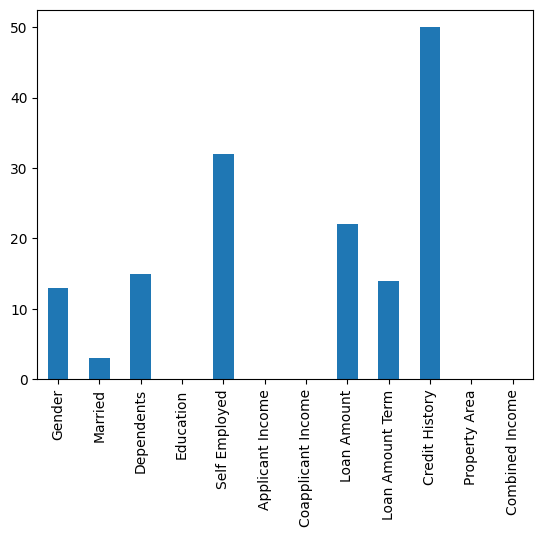

In [258]:
# Identify columns with NA's
clean_df.isna().sum().plot(kind='bar')

In [259]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
CombinedIncome       554
dtype: int64

In [260]:
# Map columns with NA's
null_feats = []

for col in df.columns:
    if df[col].isnull().values.any() == True:
        null_feats.append(col)

null_feats


['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

Look at some basic statistics for numerical variables.

In [261]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [262]:
df[num_feats].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,CombinedIncome
count,614.000000,614.000000,592.000000,600.00000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,6458.663872
min,150.000000,0.000000,9.000000,12.00000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,81000.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [263]:
# 1 Applicants with Credit History
print(df.agg('Credit_History').value_counts())
print(f'Total Null values for Credit History: {df.Credit_History.isna().sum()}')

1.0    475
0.0     89
Name: Credit_History, dtype: int64
Total Null values for Credit History: 50


In [264]:

statistics = ['min', 'max', 'median', 'mean', 'skew']

stats_dict = {}
for col in num_feats:
    stats_dict[col] = statistics

df[num_feats].agg(stats_dict)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,CombinedIncome
min,150.000000,0.000000,9.000000,12.000000,1442.000000
max,81000.000000,41667.000000,700.000000,480.000000,81000.000000
median,3812.500000,1188.500000,128.000000,360.000000,5416.500000
mean,5403.459283,1621.245798,146.412162,342.000000,7024.705081
skew,6.539513,7.491531,2.677552,-2.362414,5.633449


#### EDA Visualizations

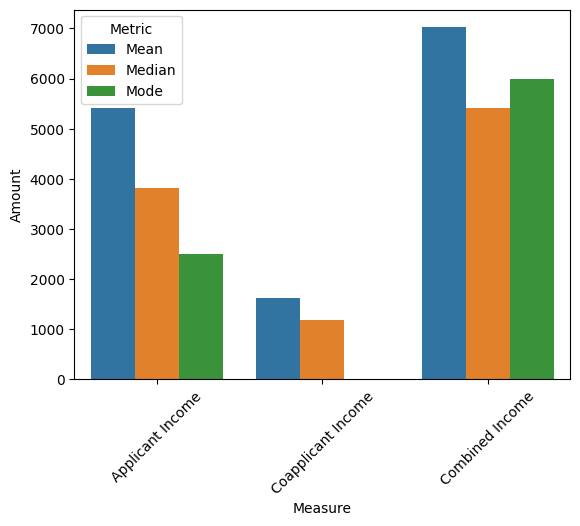

In [265]:
# creation of graph for statistical comparisons
graph_feats = ['Applicant Income', 'Coapplicant Income', 'Combined Income']

graphx = pd.DataFrame(clean_df[graph_feats].mean()).rename(columns={0:'Amount'}).reset_index()
graphx['Metric'] = 'Mean'
graphy = pd.DataFrame(clean_df[graph_feats].median()).rename(columns={0:'Amount'}).reset_index()
graphy['Metric'] = 'Median'
graphz = clean_df[graph_feats].mode().reset_index().T.drop('index', axis=0).rename(columns={0:'Amount'})
graphz = graphz.reset_index()
graphz['Metric'] = 'Mode'

combo_graph = pd.concat([graphx, graphy, graphz]).rename(columns={'index':'Measure'})

ax = sns.barplot(data=combo_graph, x='Measure', y='Amount', hue='Metric')
ax.tick_params(axis='x', rotation=45)

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [266]:
df[cat_feats].nunique()

Gender            2
Married           2
Dependents        4
Education         2
Self_Employed     2
Property_Area     3
Credit_History    2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

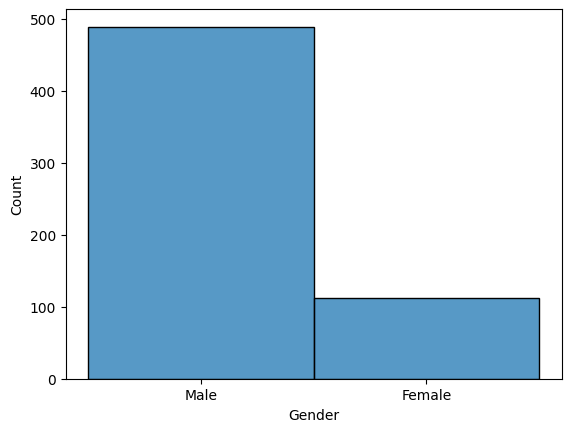

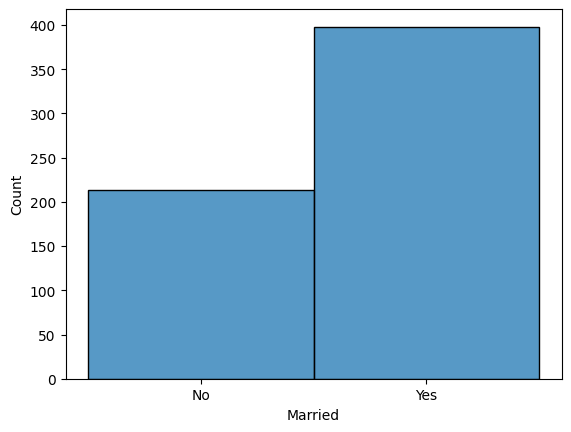

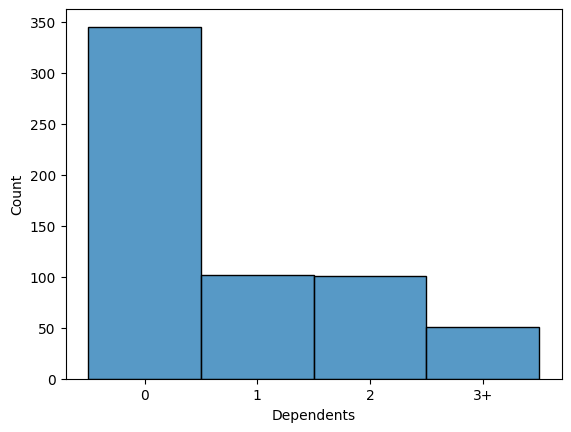

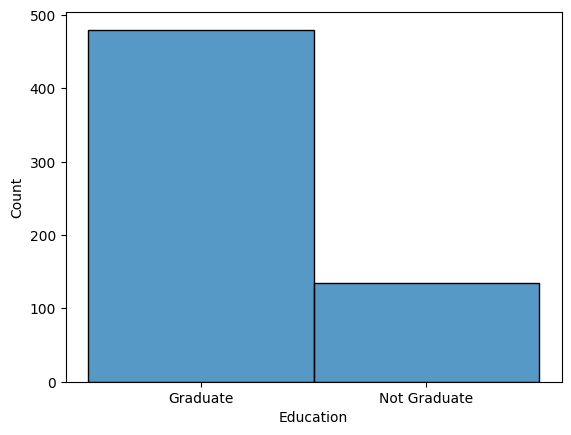

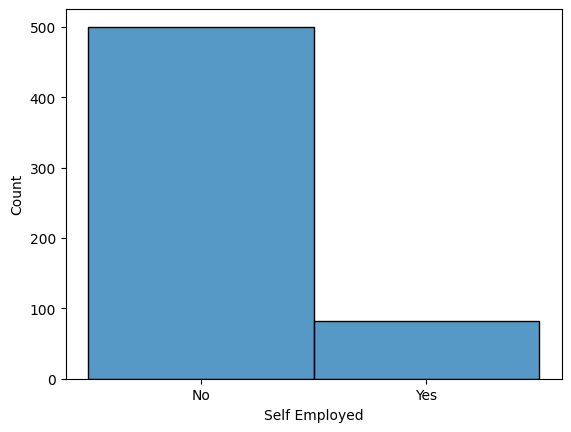

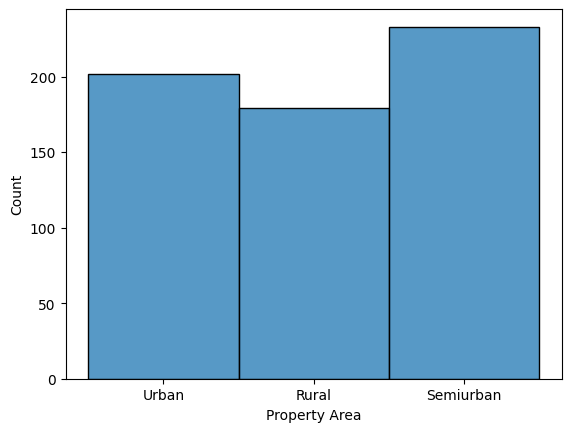

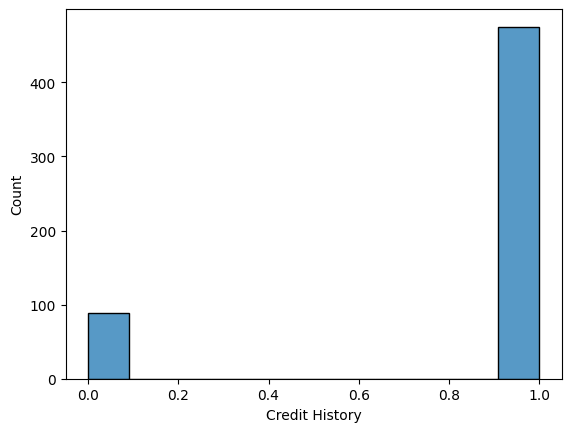

In [267]:
from matplotlib import pyplot as plt
import plotly.express as px

for col in clean_df[clean_cat_feats]:
    sns.histplot(clean_df[col])
    plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



C:\Users\jrilk\AppData\Local\Temp\ipykernel_21884\2665047901.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


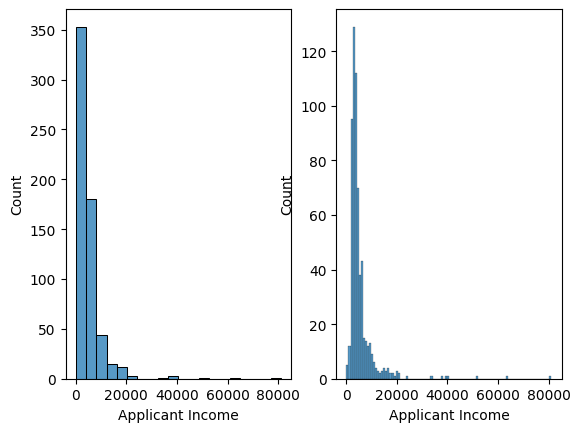

In [268]:
fig, ax = plt.subplots(1,2)
sns.histplot(clean_df['Applicant Income'], bins= 20, ax=ax[0])
sns.histplot(clean_df['Applicant Income'], bins= 100, ax=ax[1])
fig.show()

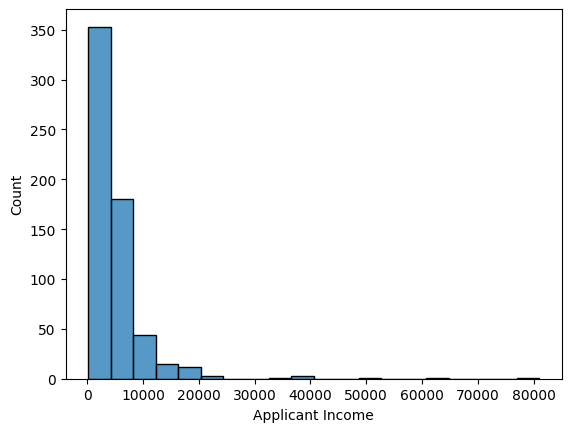

<AxesSubplot: xlabel='Applicant Income', ylabel='Count'>

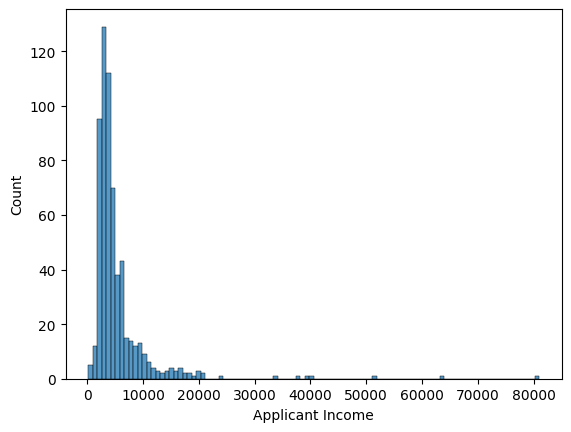

In [269]:
sns.histplot(clean_df['Applicant Income'], bins= 20)
plt.show()
sns.histplot(clean_df['Applicant Income'], bins= 100)


Look at box plots to understand the distributions. 

Look at the distribution of income segregated  by `Education`

<AxesSubplot: xlabel='Applicant Income', ylabel='Education'>

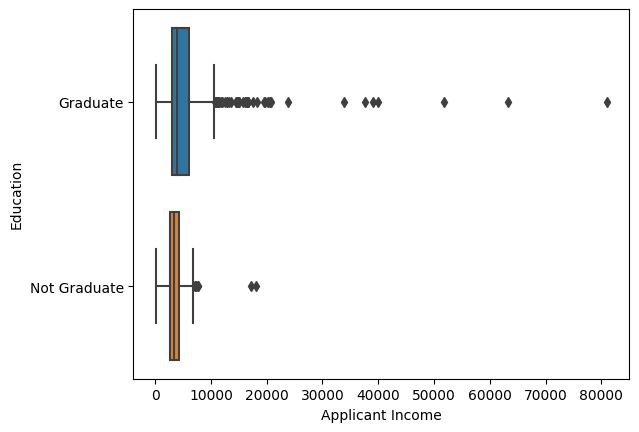

In [270]:
sns.boxplot(x=clean_df['Applicant Income'], y=clean_df.Education)

<AxesSubplot: xlabel='Combined Income', ylabel='Education'>

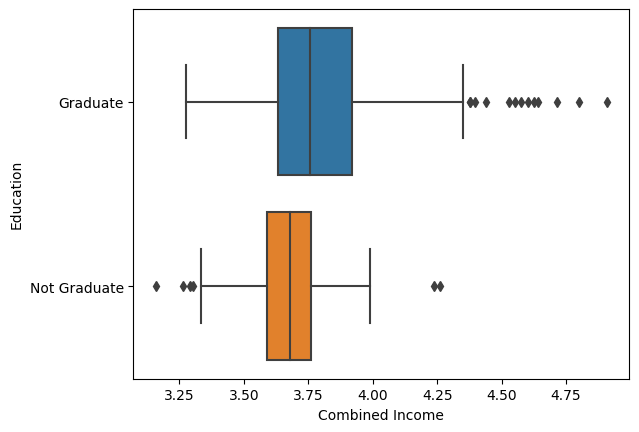

In [271]:
sns.boxplot(x=np.log10(clean_df['Combined Income']), y=clean_df.Education)

<AxesSubplot: xlabel='Applicant Income', ylabel='Education'>

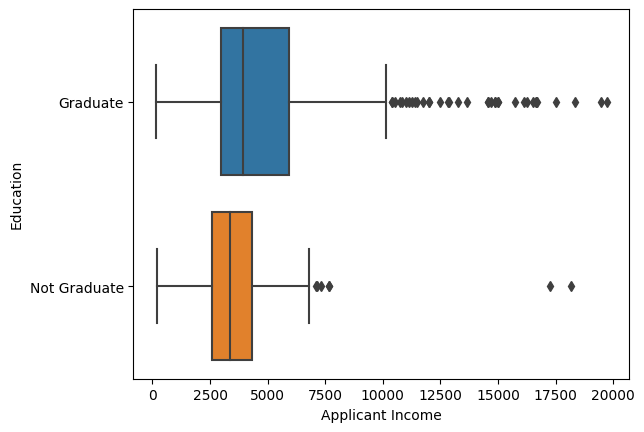

In [272]:
# Filter to Income < 20k 
df_filter = clean_df[clean_df['Applicant Income'] < 20000]

sns.boxplot(x=df_filter['Applicant Income'], y=df.Education)

Look at the histogram and boxplot of LoanAmount

<AxesSubplot: xlabel='Loan Amount', ylabel='Count'>

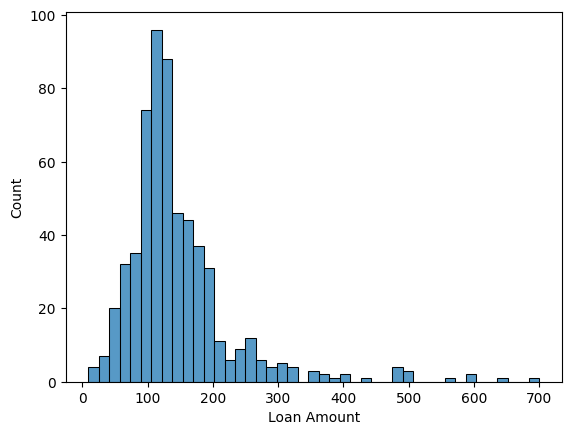

In [273]:
sns.histplot(clean_df['Loan Amount'])

<AxesSubplot: xlabel='Gender', ylabel='Loan Amount'>

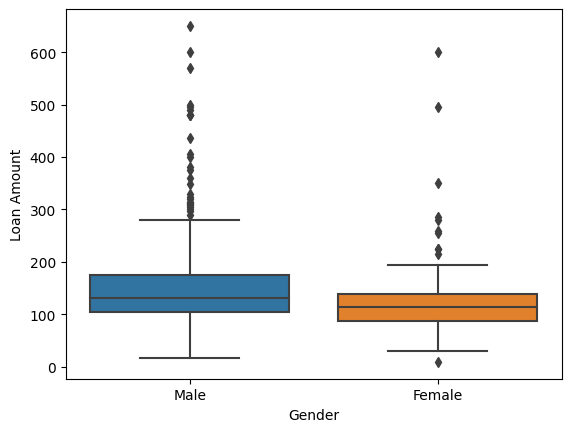

In [274]:
sns.boxplot(y = clean_df['Loan Amount'], x = df.Gender)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [275]:
# Data per Loan Amount, Gender, Education

pd.pivot_table(
    clean_df, 
    values=['Loan Amount'], 
    index=['Gender'], 
    columns=['Education'], 
    aggfunc=np.sum,
    fill_value='mean'
)

Loan Amount             
Education    Graduate Not Graduate
Gender                            
Female          11687         2123
Male            57352        12803

<AxesSubplot: xlabel='Gender'>

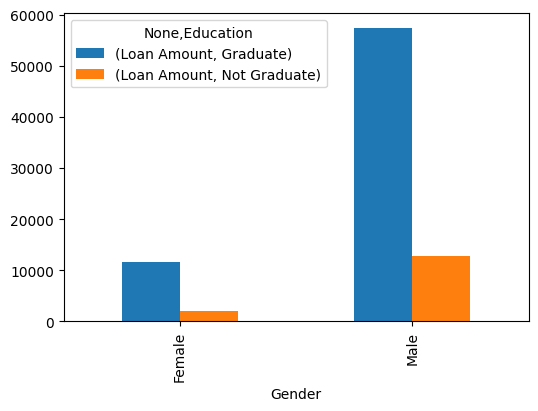

In [276]:
# Data per Loan Amount, Gender, Education

graph = pd.pivot_table(
    clean_df, 
    values=['Loan Amount'], 
    index=['Gender'], 
    columns=['Education'], 
    aggfunc=np.sum,
    # fill_value=df.LoanAmount.mean()
)

graph.plot(kind='bar', figsize=(6,4))

#### Preliminary Hypothesis Testing

<AxesSubplot: xlabel='Credit History'>

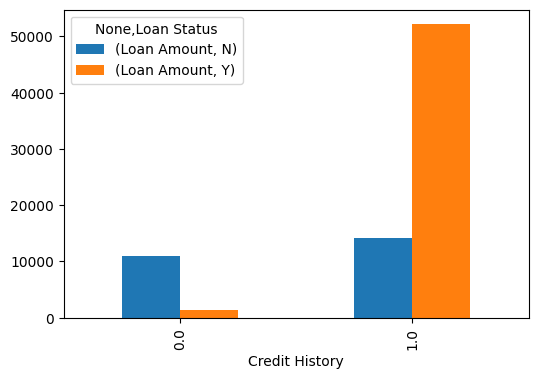

In [277]:
# Applicants w/ a Credit History

graph = pd.pivot_table(
    clean_raw_df, 
    values=['Loan Amount'], 
    index=['Credit History'], 
    columns=['Loan Status'], 
    aggfunc=np.sum
)

graph.plot(kind='bar', figsize=(6,4))

<AxesSubplot: xlabel='Married'>

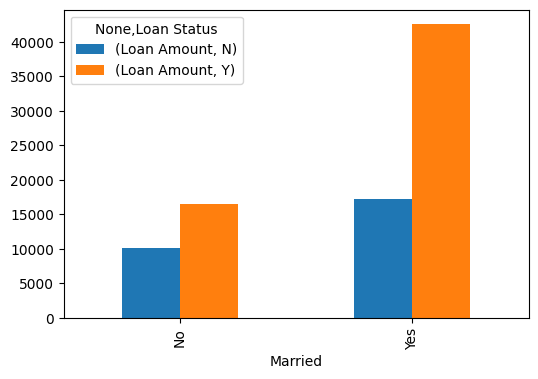

In [278]:
# Applicants w/ a higher combined income

graph = pd.pivot_table(
    clean_raw_df, 
    values=['Loan Amount'], 
    index=['Married'], 
    columns=['Loan Status'], 
    aggfunc=np.sum
)

graph.plot(kind='bar', figsize=(6,4))

<AxesSubplot: xlabel='Dependents'>

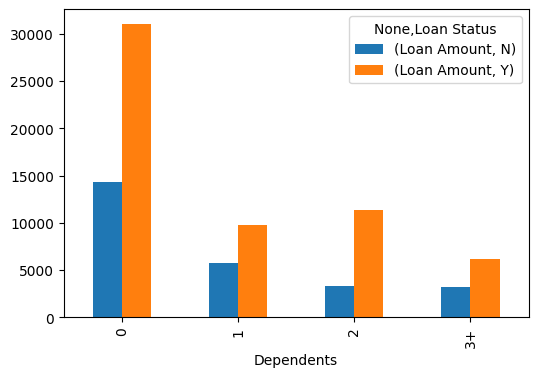

In [279]:
# Applicants w/ a higher combined income

graph = pd.pivot_table(
    clean_raw_df, 
    values=['Loan Amount'], 
    index=['Dependents'], 
    columns=['Loan Status'], 
    aggfunc=np.sum
)

graph.plot(kind='bar', figsize=(6,4))

<AxesSubplot: xlabel='Self Employed'>

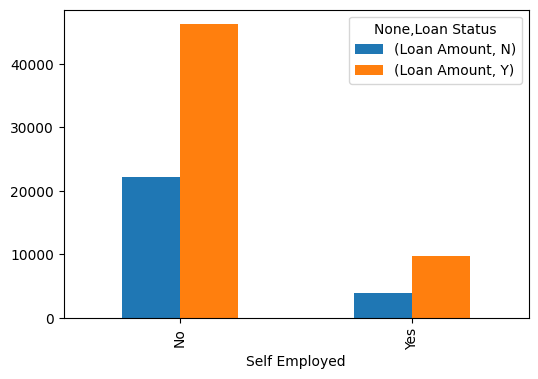

In [280]:
# Applicants w/ a higher combined income

graph = pd.pivot_table(
    clean_raw_df, 
    values=['Loan Amount'], 
    index=['Self Employed'], 
    columns=['Loan Status'], 
    aggfunc=np.sum
)

graph.plot(kind='bar', figsize=(6,4))

<AxesSubplot: >

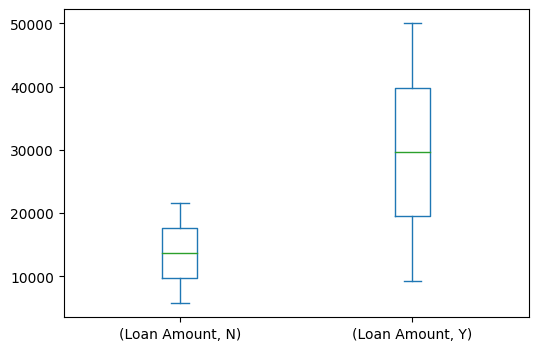

In [281]:
# Applicants w/ an education 

graph = pd.pivot_table(
    clean_raw_df, 
    values=['Loan Amount'], 
    index=['Education'], 
    columns=['Loan Status'], 
    aggfunc=np.sum
)

graph.plot(kind='box', figsize=(6,4))

<AxesSubplot: ylabel='Property Area'>

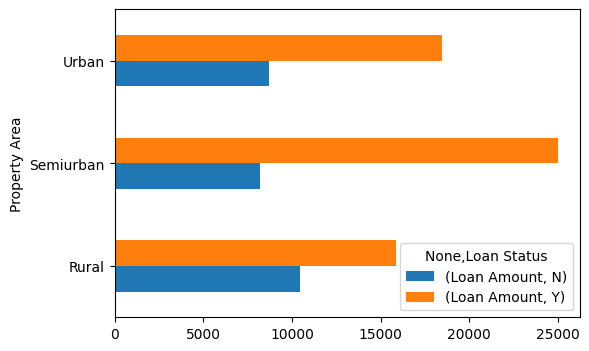

In [282]:
# Applicants in different property areas
graph = pd.pivot_table(
    clean_raw_df, 
    values=['Loan Amount'], 
    index=['Property Area'], 
    columns=['Loan Status'], 
    aggfunc=np.sum
)

graph.plot(kind='barh', figsize=(6,4))

#### T-Score Calculation

In [283]:
# attempts at statistical analysis

def t_score(df, col_filter, degfree=613):
    for col in df[col_filter]:
        print(f'{col} top 5')
        print(df[col].nlargest(5))
        print(f'{col} bottom 5')
        print(df[col].nsmallest(5))
        
        # Each z-score tells us how many standard deviations away an individual value is from the mean. For example:

        data = df[col]
        zscore = stats.zscore(data)
        x_array = stats.t.sf(zscore, df=degfree)
        sns.histplot(x_array, bins=50)#.set(title=col)
        plt.figure()
    

Applicant Income top 5
409    81000
333    63337
171    51763
155    39999
185    39147
Name: Applicant Income, dtype: int64
Applicant Income bottom 5
216    150
468    210
600    416
500    645
188    674
Name: Applicant Income, dtype: int64
Coapplicant Income top 5
600    41667.0
581    33837.0
402    20000.0
417    20000.0
177    11300.0
Name: Coapplicant Income, dtype: float64
Coapplicant Income bottom 5
0     0.0
2     0.0
4     0.0
15    0.0
16    0.0
Name: Coapplicant Income, dtype: float64
Loan Amount top 5
171    700.0
130    650.0
155    600.0
561    600.0
369    570.0
Name: Loan Amount, dtype: float64
Loan Amount bottom 5
568     9.0
14     17.0
94     25.0
133    25.0
555    26.0
Name: Loan Amount, dtype: float64
Loan Amount Term top 5
75     480.0
109    480.0
130    480.0
168    480.0
179    480.0
Name: Loan Amount Term, dtype: float64
Loan Amount Term bottom 5
497    12.0
262    36.0
546    36.0
68     60.0
242    60.0
Name: Loan Amount Term, dtype: float64
Combined Inco

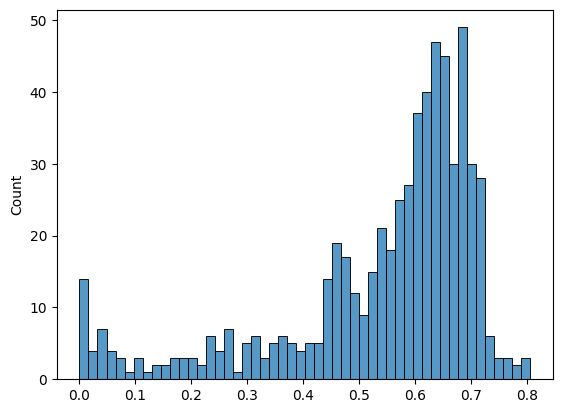

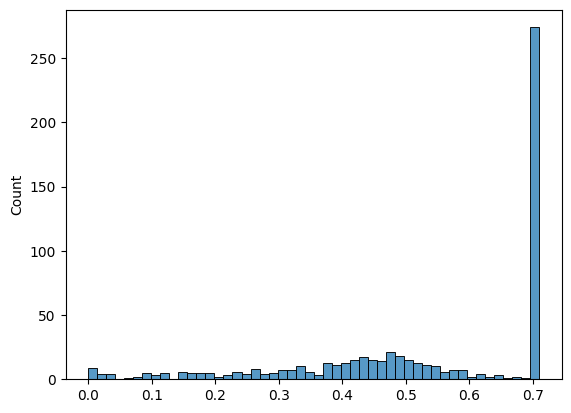

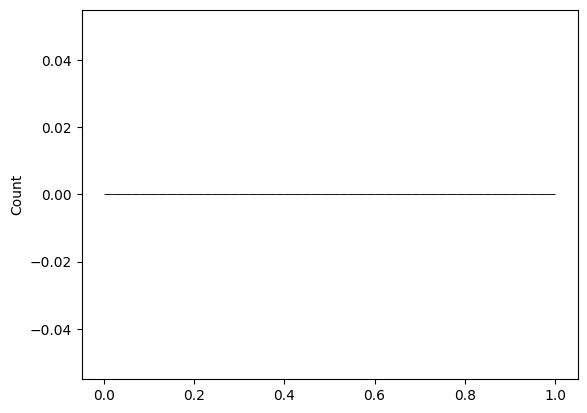

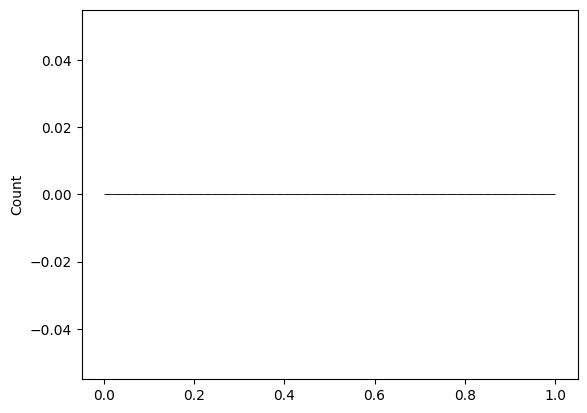

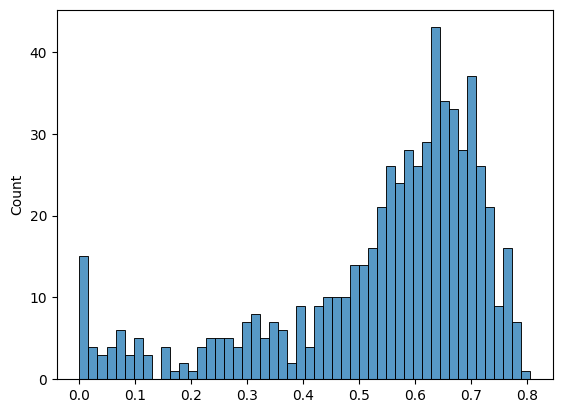

<Figure size 640x480 with 0 Axes>

In [284]:
t_score(clean_df, clean_num_feats)

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

<AxesSubplot: xlabel='Loan Amount', ylabel='Count'>

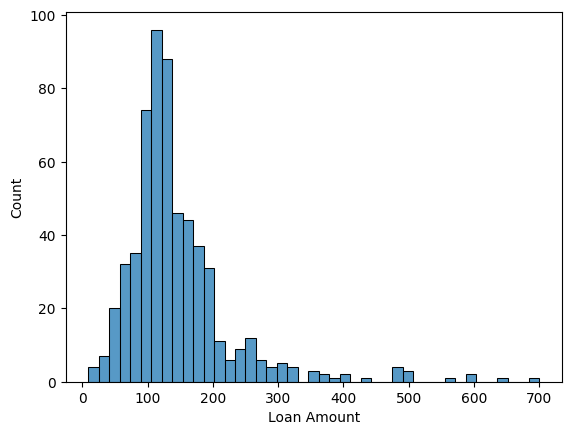

In [285]:
sns.histplot(clean_df['Loan Amount'])

### Imputing Categorical Figures

In [286]:
# How to treat each column with NaNs
## Gender - use Mode (M) - try with (F) to see if it changes results
## Dependents - use Mode (0) - some minor right skew, rest are 1-2
## Self_Employed - use Mode (N) - very heavy right skew
## Credit_History - Use Mode (Y) - try it with (N) to see if it changes results
## LoanAmount - Use Median
## Loam_Amount_Term - Use Median

# These will be imputed during the Pipeline phase

null_feats


['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [287]:
xdf = df.groupby('Credit_History').agg(stats_dict).T.reindex()
xdf

Credit_History                     0.0           1.0
ApplicantIncome   min      1500.000000    150.000000
                  max     81000.000000  63337.000000
                  median   3547.000000   3859.000000
                  mean     5679.438202   5426.526316
                  skew        6.772115      5.351295
CoapplicantIncome min         0.000000      0.000000
                  max     11300.000000  33837.000000
                  median   1330.000000   1040.000000
                  mean     1542.179775   1528.250358
                  skew        2.190092      6.306433
LoanAmount        min        45.000000      9.000000
                  max       600.000000    700.000000
                  median    125.000000    128.000000
                  mean      146.717647    144.786026
                  skew        3.081917      2.559941
Loan_Amount_Term  min       180.000000     36.000000
                  max       480.000000    480.000000
                  median    360.000000    360.000000
                  mean      341.927711    342.192719
                  skew       -1.334862     -2.459761
CombinedIncome    min      1830.000000   1442.000000
                  max     81000.000000  63337.000000
                  median   5230.000000   5416.000000
                  mean     7221.617978   6954.776674
                  skew        6.481077      4.743936

#### Idea - Imputation of NaN's

In [288]:
# Create a function that will impute NaN values through a regression or classification pipeline
# It isolates a specific row (null_feats), drops all other na values in that
# specific row becomes the target variable and makes up the test set, all others are training
# point of it is to do overfitting, best guess you can make with limited data
# think of an order to  it in, the higher the NaN's first or last??  Probably last as you would want more data to impute
# Categorical will need to be a classification (when Y/N), Non-Booleans will need regression as the value does not have a rank
# This means ordering is not important when that is the target variable

# Index what rows have that specifc null_feats
# Loop function:
# take null_feats, put that into a for-loop
# target = null_feats[n]
# training = df.drop(null_feats[n])
# clean_training = training.dropna()


In [289]:

# def imputer(df):

# df_exp = df_raw

# df_target = df_exp[null_feats[0]]
# df_data = df_exp.drop(columns=null_feats[0])
# df_target_fit = df_target.dropna()
# y2 = lb.fit_transform(df_target)

# y2 = lb.fit_transform(df_target)
# y2
# df_exp[df_exp['Loan_Amount_Term'].isnull()]
# df_target = null_feats[col]

In [290]:
# df_exp[df_exp['Loan_Amount_Term'].isnull()]

In [291]:
# df[df.isnull().any(axis=1)]

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot: xlabel='Loan Amount', ylabel='Count'>

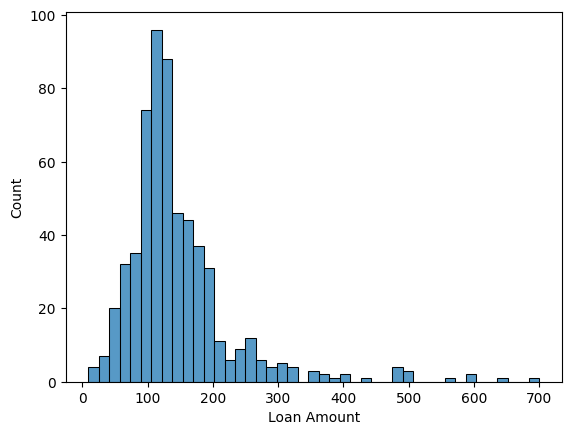

In [292]:
sns.histplot(clean_df['Loan Amount'])

<AxesSubplot: xlabel='Loan Amount', ylabel='Count'>

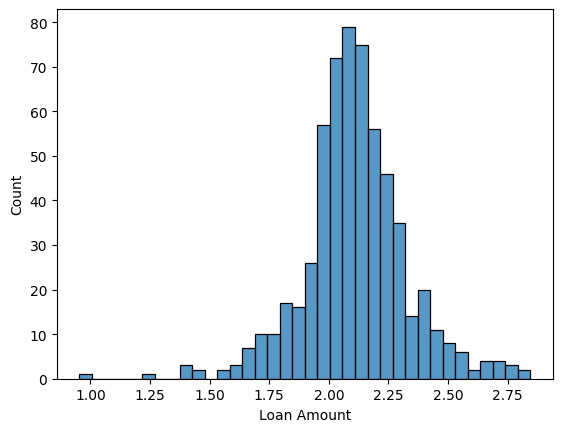

In [293]:
sns.histplot(np.log10(clean_df['Loan Amount']))

#### Log 10 for all numeric features

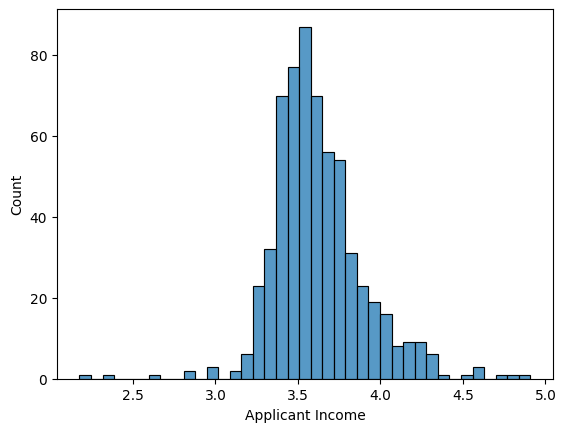

C:\Users\jrilk\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


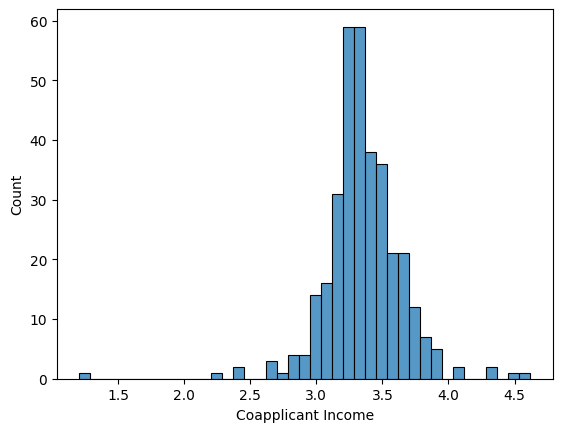

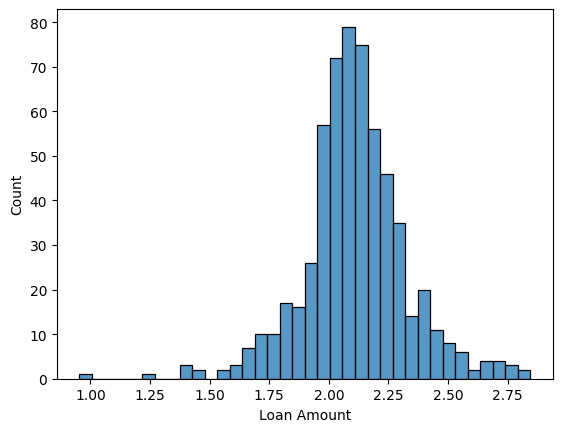

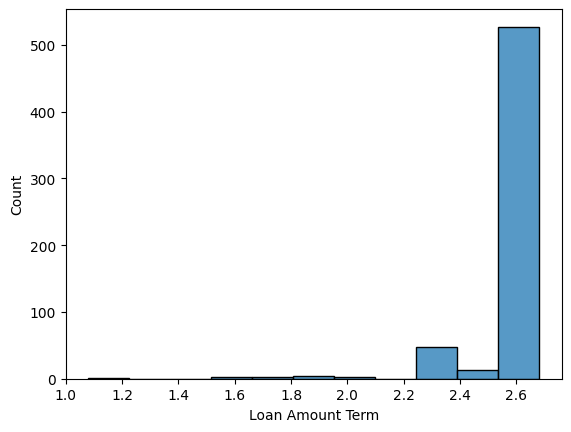

In [294]:
for col in clean_num_feats[:-1]:
    sns.histplot(np.log10(clean_df[col]))
    # plt.title(col)
    plt.show()

#### Combine both incomes as total income and take a log transformation of the same.

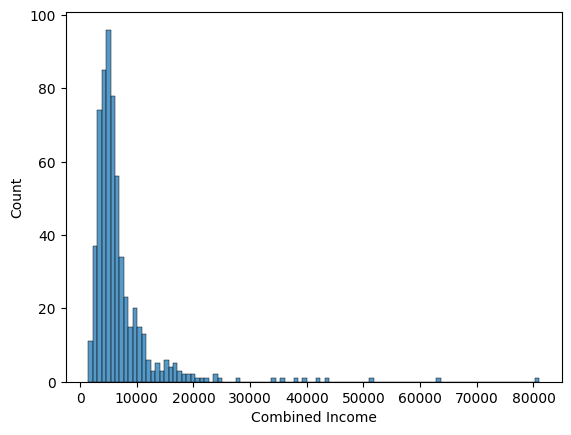

<AxesSubplot: xlabel='Combined Income', ylabel='Count'>

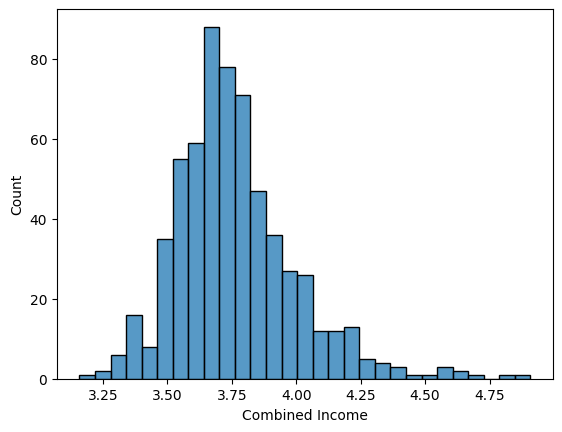

In [295]:
# Log 10 of combined incomes
sns.histplot(clean_df['Combined Income'])
plt.show()
sns.histplot(np.log10(clean_df['Combined Income']))

<AxesSubplot: ylabel='Count'>

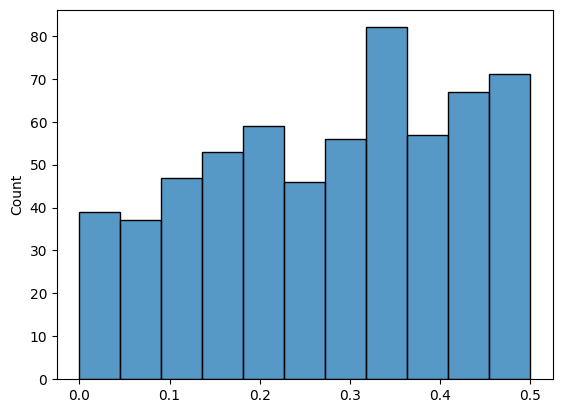

In [296]:
# T-Score of Log10 Combined Incomes

y_array_score = stats.zscore(np.log10(df['CombinedIncome']))
y_array = stats.t.sf(abs(y_array_score),df=12)
sns.histplot(y_array)

#### Drop Outliers - Not Implemented

In [297]:
b = df.ApplicantIncome.nlargest(5).index.tolist()
b

[409, 333, 171, 155, 185]

In [298]:
for col in df[num_feats]:
    print(f'{col} top 5')
    print(df[col].nlargest(5))
    print(f'{col} bottom 5')
    print(df[col].nsmallest(5))

ApplicantIncome top 5
409    81000
333    63337
171    51763
155    39999
185    39147
Name: ApplicantIncome, dtype: int64
ApplicantIncome bottom 5
216    150
468    210
600    416
500    645
188    674
Name: ApplicantIncome, dtype: int64
CoapplicantIncome top 5
600    41667.0
581    33837.0
402    20000.0
417    20000.0
177    11300.0
Name: CoapplicantIncome, dtype: float64
CoapplicantIncome bottom 5
0     0.0
2     0.0
4     0.0
15    0.0
16    0.0
Name: CoapplicantIncome, dtype: float64
LoanAmount top 5
171    700.0
130    650.0
155    600.0
561    600.0
369    570.0
Name: LoanAmount, dtype: float64
LoanAmount bottom 5
568     9.0
14     17.0
94     25.0
133    25.0
555    26.0
Name: LoanAmount, dtype: float64
Loan_Amount_Term top 5
75     480.0
109    480.0
130    480.0
168    480.0
179    480.0
Name: Loan_Amount_Term, dtype: float64
Loan_Amount_Term bottom 5
497    12.0
262    36.0
546    36.0
68     60.0
242    60.0
Name: Loan_Amount_Term, dtype: float64
CombinedIncome top 5
409 

In [299]:
df.loc[171]

Gender                    NaN
Married                   Yes
Dependents                 3+
Education            Graduate
Self_Employed              No
ApplicantIncome         51763
CoapplicantIncome         0.0
LoanAmount              700.0
Loan_Amount_Term        300.0
Credit_History            1.0
Property_Area           Urban
CombinedIncome        51763.0
Name: 171, dtype: object

In [300]:
## Index Rows to drop:
# 409 - AppIncome $81k
# 333 - AppIncome $63k
# 600 - CoAppInc $42k
# 581 - CoAppInc $34k
# 586 - LoanAmt $9
# 171 - LoanAmt $700
drop_list = [409, 333, 600, 581, 586, 171]

In [301]:
df_test = df
df_dropped = df_test.drop(drop_list)
df_dropped

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,CombinedIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,7583.0


## 4. Building a Predictive Model

### Preparing Features for Pipeline

#### Splitting into Train/Test sets

In [302]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

df = df_raw.drop(columns=col_drop, axis=1)

# Add Combined Income as feature
df['CombinedIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [303]:
def testTrainSplit(df):
    # I know I should add definitions...
    df_train = df.sample(frac=0.8, random_state=42).sort_index()

    y_train = y[y.index.isin(df_train.index.tolist())]
    y_train = lb.fit_transform(y_train)
    y_train = y_train.ravel(order='C')

    df_test = df[~df.index.isin(df_train.index.tolist())].sort_index()

    y_test = y[y.index.isin(df_test.index.tolist())]
    y_test = lb.fit_transform(y_test)
    y_test = y_test.ravel(order='C')

    return df_train, y_train, df_test, y_test

In [304]:
df_train, y_train, df_test, y_test = testTrainSplit(df)

In [305]:
clean_df = df.rename(columns={
    'Self_Employed': 'Self Employed',
    'ApplicantIncome': 'Applicant Income',
    'CoapplicantIncome': 'Coapplicant Income',
    'LoanAmount': 'Loan Amount',
    'Loan_Amount_Term': 'Loan Amount Term',
    'Credit_History': 'Credit History',
    'Property_Area': 'Property Area',
    'CombinedIncome': 'Combined Income'
})
clean_cols = clean_df.columns

#### Feature Engineering

In [306]:
# def feat_eng(df):
#     df_train = df
#     df_train['CombinedIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']

    #########################################################################################
    # Features that would be nice to engineer in with more time:

    # df_train['ApplicantIncome'] = np.log10(df['ApplicantIncome'])
    # df_train['CoapplicantIncome'] = np.log10(df['CoapplicantIncome'])
    # df_train['CombinedIncome'] = np.log10(df['CombinedIncome'])
    # df_train['NoDependents'] = df_train['Dependents'] == '0'
    # df_train['TwoIncomes'] = df_train['CoapplicantIncome'] > 0
    # df_train['CombinedMedianInc'] = df_train['CombinedIncome'] > df_train.ApplicantIncome.mean()
    # df_train['CoapplicantGrtrApplicant'] = df_train['CoapplicantIncome'] > df_train['ApplicantIncome']

    # return df_train

#### Column Headers

In [307]:
def col_types(df):

    #column types split between ordinal and nominal
    cat_feats = df.select_dtypes(include=['object']).columns.tolist()
    bool_feats = df.select_dtypes(include=['bool']).columns.tolist()
    cat_feats += bool_feats
    num_feats = df.drop(columns=cat_feats).columns.to_list()

    # Move Credit History to a categorical value
    cat_feats.append(num_feats.pop(-2))

    # Review category listings
    print(f'The Numerical columns are:\n{num_feats}')
    print(f'The Categorial columns are:\n{cat_feats}')

    return num_feats, cat_feats

In [308]:
num_feats, cat_feats = col_types(df_train)

The Numerical columns are:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'CombinedIncome']
The Categorial columns are:
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']


#### Pipeline Modules

In [309]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from numpy import inf

In [310]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
enc = OneHotEncoder()

#### Pipeline

In [311]:
# num_feats = ['LoanAmount', 'Loan_Amount_Term']
# log_feats = ['ApplicantIncome', 'CoapplicantIncome', 'CombinedIncome']
# cat_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

In [312]:
# Using own function in Pipeline

def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

# def logFeat(data):
#     return data[log_feats]

In [313]:
# df = df_raw.drop(columns=col_drop, axis=1)

 # Add Combined Income as feature
# df['CombinedIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [314]:
def logConversion(df, col_list):
    # for col in col_list[:2]:
    #     col = df[col].name
    #     df[f'{col}_log'] = np.log10(df[col])
    # df['CoapplicantIncome_log'] = np.log10(df['CoapplicantIncome'])
    # df['CoapplicantIncome_log'][df['CoapplicantIncome_log'] == -inf] = 0
    # df = df.drop(columns=col_list)
    for col in col_list[:2]:
        # col = df[col].name
        df[col] = np.log10(df[col])
    df['CoapplicantIncome'] = np.log10(df['CoapplicantIncome'])
    df['CoapplicantIncome'][df['CoapplicantIncome'] == -inf] = 0
    # df = df.drop(columns=col_list)
    return df

In [315]:
# log_feats = ['ApplicantIncome', 'CoapplicantIncome', 'CombinedIncome']
# df_train_log = logConversion(df_train, log_feats)
# df_train_log

In [316]:
# datamodel = [df_train_log, y_train, df_test, y_test]
datamodel = [df_train, y_train, df_test, y_test]

In [317]:
# create pipeline, which uses a specific model

# Ideal Pipeline

## Data Prep
# AppInc,CombInc - Logarithmic Scale, no other scaling needed

## Imputation
# CoAppInc, LoanAmt, LoanTerm
# Categorical

## 
# LoanAmt, LoanTerm - StandardScale
# Categorical - One Hot Encode

## Data
# PCA on One Hot Encode
# KBest on Numerical

def pipeline(model, datamodel):

    # log_scale = Pipeline([
    #     'scaling', 
    # ])


    # feature_engineering = FunctionTransformer([
    #     ('feature_eng', feat_eng(df))
    # ])

    numeric_transform = Pipeline([
        ('impute_mean', SimpleImputer(strategy='mean')),
        ('scaling', StandardScaler()),
        ('select_k_best', SelectKBest(k=3))
    ])

    categorical_transform = Pipeline([
        ('impute_mode', SimpleImputer(strategy='most_frequent')),
        ('one-hot-encode', OneHotEncoder(sparse=False)),
        ('pca', PCA(n_components=3))
    ])

    # log_transform = Pipeline([
    #     ('log_trans', logConversion(datamodel[0], log_feats)),
    #     ('impute_mean', SimpleImputer(strategy='mean')),
    #     ('select_k_best', SelectKBest(k=3))
    # ])

    preprocessing = ColumnTransformer([
        ('numeric', numeric_transform, num_feats),
        ('categorical', categorical_transform, cat_feats)
        # ('log_transfor', log_transform)
    ])

    union = FeatureUnion([
        ('pca', PCA(n_components=3)),
        ('select_k_best', SelectKBest(k=3))
    ])

    pipeline = Pipeline([
        # ('log_scaling', log_scale)
        ('preprocessing', preprocessing),
        # ('feature_engineering', feature_engineering),
        ('features', union),
        ('model', model)
    ])

    if model == lr:
        params = {
            'features__pca__n_components': [1, 2, 3],
            'features__select_k_best__k': [1, 2, 3],
            'model__solver': ['lbfgs'],
            'model__penalty': ['l2', 'none']
        }
    elif model == rfc:
        params = {
            'features__pca__n_components': [1, 2, 3],
            'features__select_k_best__k': [1, 2, 3],
            'model__n_estimators': [10, 50, 75, 100]
        }
    elif model == gbc:
        params = {
            'features__pca__n_components': [1, 2, 3],
            'features__select_k_best__k': [1, 2, 3],
            'model__n_estimators': [10, 50, 100]
        }
    else:
        pass

    grid_search = GridSearchCV(pipeline, params, verbose=1)
    model = grid_search.fit(datamodel[0], datamodel[1])
    print(f'The parameters were:\n{grid_search.best_params_}') 
    print(f'The best score was: {grid_search.best_score_}')
        
    # model = pipeline.fit(datamodel[0], datamodel[1])
    return model

Try paramater grid search to improve the results

In [318]:
model_lr = pipeline(lr, datamodel)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The parameters were:
{'features__pca__n_components': 2, 'features__select_k_best__k': 3, 'model__penalty': 'none', 'model__solver': 'lbfgs'}
The best score was: 0.682209853638425


In [319]:
model_rfc = pipeline(rfc, datamodel)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
The parameters were:
{'features__pca__n_components': 1, 'features__select_k_best__k': 3, 'model__n_estimators': 50}
The best score was: 0.6945372088229231


In [320]:
model_gbc = pipeline(gbc, datamodel)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
The parameters were:
{'features__pca__n_components': 1, 'features__select_k_best__k': 3, 'model__n_estimators': 50}
The best score was: 0.7026592455163885


In [321]:
print(f'The score for the Logistic Regression model is: {model_lr.score(df_test, y_test)}')
print(f'The score for the Random Forest model is: {model_rfc.score(df_test, y_test)}')
print(f'The score for the Gradient Boost model is: {model_gbc.score(df_test, y_test)}')

The score for the Logistic Regression model is: 0.7073170731707317
The score for the Random Forest model is: 0.7804878048780488
The score for the Gradient Boost model is: 0.7479674796747967


#### Pickle the model

In [322]:
import pickle

# Use the best model for the pickle

pickle.dump(model_rfc, open('model.p', 'wb'))

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [323]:
# Prediction on all results

y_pred_lr = model_lr.predict(datamodel[2])
y_pred_rfc = model_rfc.predict(datamodel[2])
y_pred_gbc = model_gbc.predict(datamodel[2])

In [324]:
import json

# Prediction on a random sample:

df_sample = pd.concat([df_train, df_test]).reset_index()

x_sample = df_sample.sample()

y_pred_lr = model_lr.predict(x_sample)
y_pred_rfc = model_rfc.predict(x_sample)
y_pred_gbc = model_gbc.predict(x_sample)

print('The predictions for each model are:')
print(f'Logistic Regression: {y_pred_lr}')
print(f'Random Forest: {y_pred_rfc}')
print(f'Gradient Boost: {y_pred_gbc}')
display = json.loads(x_sample.to_json(orient='records'))

print("\nApplicant's information: ")
display[0]

The predictions for each model are:
Logistic Regression: [1]
Random Forest: [1]
Gradient Boost: [1]

Applicant's information: 


{'index': 42,
 'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '0',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 2400,
 'CoapplicantIncome': 0.0,
 'LoanAmount': 75.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': None,
 'Property_Area': 'Urban',
 'CombinedIncome': 2400.0}

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

#### API Call

In [ ]:
# http://ec2-44-203-126-81.compute-1.amazonaws.com:8888/lab

import json
import requests

df_sample = df.sample() # random_state=42

df_post = df_sample.to_json(orient='records')
json_ = json.loads(df_post)
json_parsed = json_[0]

url = 'http://ec2-44-203-126-81.compute-1.amazonaws.com:4242/loans'

# sending a request and saving the response as response object
r = requests.post(url=url, json=json_parsed)

print(r.text)

json_

In [ ]:
# Thank you for getting all the way to this point.
# Hypothesis currently unsubstantiated.